In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [67]:
df=pd.read_csv('C:\\Users\\somes\\AAS\\Cricket.csv',encoding= 'unicode_escape')

In [60]:
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15


In [68]:
df.head(50)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28
5,Inzamam-ul-Haq (Asia/PAK),1991-2007,378,350,53,11739,137*,39.52,15812,74.24,10,83,20
6,JH Kallis (Afr/ICC/SA),1996-2014,328,314,53,11579,139,44.36,15885,72.89,17,86,17
7,SC Ganguly (Asia/INDIA),1992-2007,311,300,23,11363,183,41.02,15416,73.70,22,72,16
8,R Dravid (Asia/ICC/INDIA),1996-2011,344,318,40,10889,153,39.16,15284,71.24,12,83,13
9,BC Lara (ICC/WI),1990-2007,299,289,32,10405,169,40.48,13086,79.51,19,63,16


In [49]:
new_df= df[['SR','Ave']]

In [50]:
new_df

,SR,Ave
0,86.23,44.83
1,78.86,41.98
2,80.39,42.03
3,91.20,32.36
4,78.96,33.37
...,...,...
74,64.92,45.03
75,73.75,43.40
76,76.98,35.36
77,92.44,39.75


In [51]:
km_mod = KMeans(n_clusters=4)

In [52]:
km_mod= km_mod.fit(new_df)

In [53]:
k=km_mod.cluster_centers_
k

array([[66.30461538, 35.55461538],
       [88.39117647, 44.16294118],
       [76.74697674, 38.08418605],
       [99.93333333, 32.12333333]])

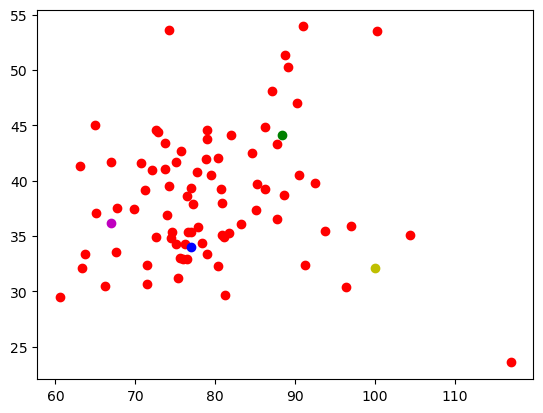

In [54]:
plt.scatter(new_df['SR'], new_df['Ave'], c='r')
plt.scatter(77.02,33.97, c='b')
plt.scatter(88.3,44.16, c='g')
plt.scatter(66.92,36.198, c='m')
plt.scatter(99.93,32.12, c='y')

In [55]:
km_mod.labels_

array([1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 3, 1, 2, 1, 2, 1, 2, 2, 1, 0,
       0, 2, 3, 1, 2, 3, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0,
       2, 0, 1, 0, 2, 2, 3, 2, 0, 2, 2, 0, 2, 1, 2, 1, 2, 3, 2, 1, 1, 1,
       2, 0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 1, 2])

In [81]:
result=df.loc[df['Player']=="V Kohli (INDIA)"]
result

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
25,V Kohli (INDIA),2008-2017,188,180,29,8146,183,53.94,8952,90.99,27,43,11


In [77]:
np.where(df.Player=='V Kohli (INDIA)')

(array([25], dtype=int64),)

In [84]:
lse=np.where( km_mod.labels_== 1)

In [87]:
df.iloc[lse]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
10,TM Dilshan (SL),1999-2016,330,303,41,10290,161*,39.27,11933,86.23,22,47,11
13,MS Dhoni (Asia/INDIA),2004-2017,295,255,70,9496,183*,51.32,10706,88.69,10,64,8
15,AB de Villiers (Afr/SA),2005-2017,222,213,39,9319,162*,53.55,9295,100.25,24,53,7
17,CH Gayle (ICC/WI),1999-2015,269,264,17,9221,215,37.33,10834,85.11,22,47,23
20,Yuvraj Singh (Asia/INDIA),2000-2017,304,278,40,8701,150,36.55,9924,87.67,14,52,18
25,V Kohli (INDIA),2008-2017,188,180,29,8146,183,53.94,8952,90.99,27,43,11
34,HM Amla (SA),2008-2017,156,153,10,7186,159,50.25,8069,89.05,25,33,3
42,IVA Richards (WI),1975-1991,187,167,24,6721,189*,47.00,7451,90.20,11,45,7
46,LRPL Taylor (NZ),2006-2017,190,176,29,6486,131*,44.12,7906,82.03,17,37,9
